## 水体提取

In [1]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 打开数据
path_img = "E:/YNU/5/OpenSourceGIS/Act_5/OnClass/呈贡10m分辨率裁剪子区域及呈贡20m分辨率/chenggong_utm48_20m.tif"

In [4]:
dset = gdal.Open(path_img)
img_arry = dset.ReadAsArray()
print(img_arry.shape)

(6, 1613, 1499)


In [27]:
band_green = dset.GetRasterBand(2).ReadAsArray().astype(np.float16)
band_swir = dset.GetRasterBand(4).ReadAsArray().astype(np.float16)
mndwi = (band_green - band_swir) / ((band_green + band_swir)+0.000001)

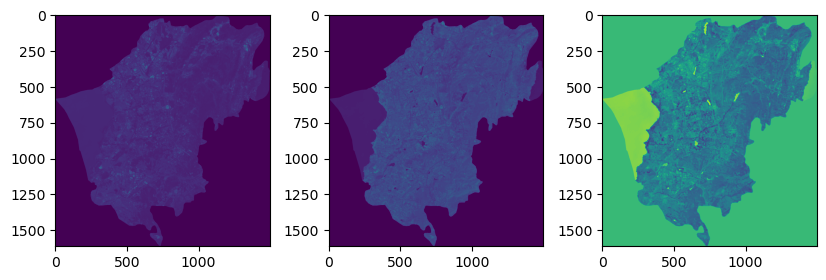

In [28]:
plt.figure(figsize=(10,3))
plt.subplot(1, 3, 1); plt.imshow(band_green)
plt.subplot(1, 3, 2); plt.imshow(band_swir)
plt.subplot(1, 3, 3); plt.imshow(mndwi)

In [29]:
id_valid = np.where(band_green != 0)
id_invalid = np.where(band_green == 0)

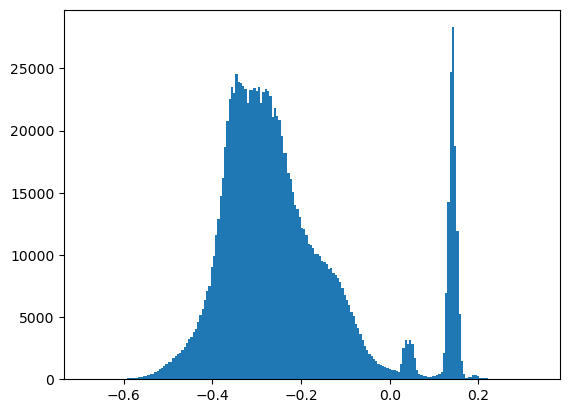

In [30]:
_ = plt.hist(mndwi[id_valid], bins = 200)

In [38]:
thre = 0
mndwi_seg = np.where(mndwi > 0, 1, 0)
mndwi_seg[id_invalid] = -1

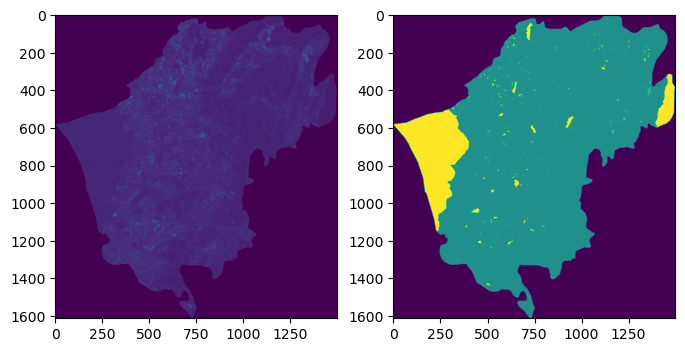

In [39]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1); plt.imshow(band_green)
plt.subplot(1, 2, 2); plt.imshow(mndwi_seg)

In [41]:
path_out = "E:/YNU/5/OpenSourceGIS/Act_5/OnClass/呈贡10m分辨率裁剪子区域及呈贡20m分辨率/chenggong_utm48_20m_mndwi.tif"
driver = gdal.GetDriverByName("GTiff")
outset = driver.Create(path_out, 
                       xsize = dset.RasterXSize, 
                       ysize = dset.RasterYSize, 
                       bands = 1, 
                       eType = gdal.GDT_Int16)
outset.SetGeoTransform(dset.GetGeoTransform())
outset.SetProjection(dset.GetProjection())
out_band = outset.GetRasterBand(1)
out_band.WriteArray(mndwi_seg)

outset = None